In [1]:

import numpy as np
import matplotlib.pyplot as plt
import librosa as lib
import librosa.display
import cv2
import os
from google.colab import drive
drive.mount('/content/drive')
from google.colab.patches import cv2_imshow

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
FullDS_path="/content/drive/MyDrive/EmotionDetectionProject/Datasets/FullDataset_Looped"
FullDS_dir=os.listdir("/content/drive/MyDrive/EmotionDetectionProject/Datasets/FullDataset_Looped")

In [4]:
HOP_SIZE=512
def get_mel_spectrogram(wav_file, destination_to_save):
    scale , sr = librosa.load(wav_file, sr = 22050) #sr= 22050 before
    D = librosa.amplitude_to_db(np.abs(librosa.stft(scale, hop_length=HOP_SIZE)), ref=np.max)
    img=librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=HOP_SIZE, x_axis='time')
    plt.axis('off')

    plt.savefig(destination_to_save, format='png', bbox_inches='tight')

    # img=cv2.imread(destination_to_save)
    # return img





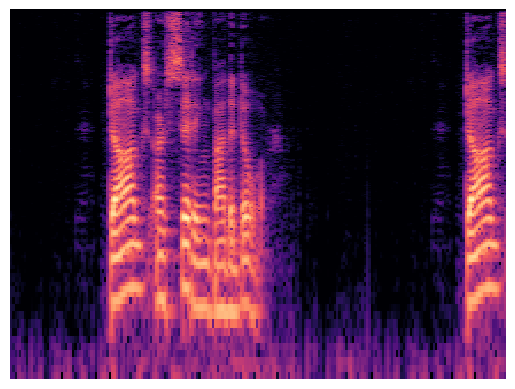

In [5]:
get_mel_spectrogram(FullDS_path+"/8547_R_neutral.wav","/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/RAVDESS_test.png")


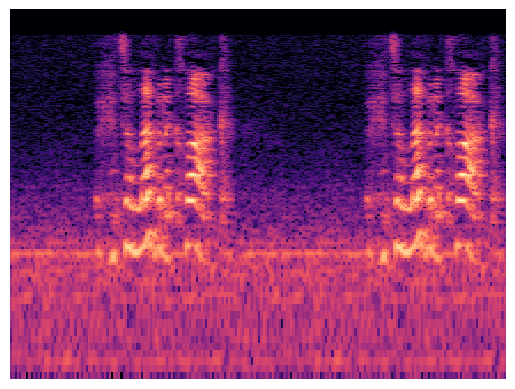

In [6]:
get_mel_spectrogram(FullDS_path+"/10139_C_disgust.wav","/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/CREMAD_test.png")


In [7]:
img=cv2.imread("/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/CREMAD_test.png")

In [8]:
img.shape

(389, 515, 3)

In [9]:
rem = []
for i in range(50):
    if np.count_nonzero(img[i] == 0)>=50:
        rem.append(i)
img = np.delete(img, rem, axis=0)

In [10]:
img.shape

(348, 515, 3)

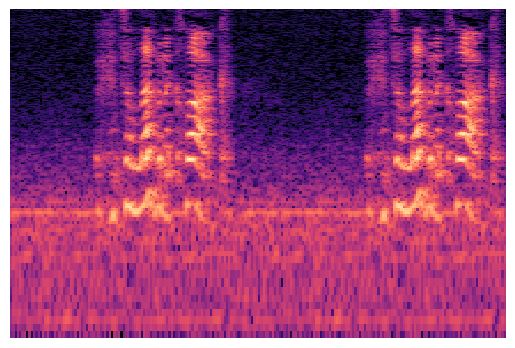

In [11]:
cv2_imshow(img)


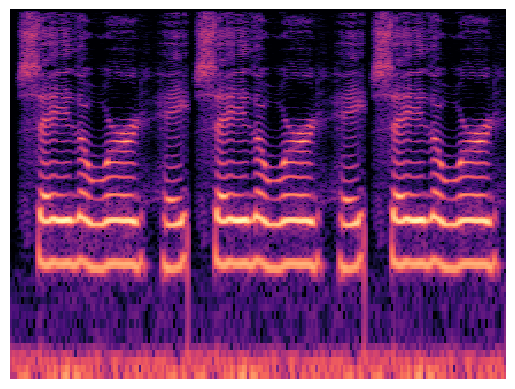

In [12]:
get_mel_spectrogram(FullDS_path+"/8666_T_neutral.wav","/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/TESS_test.png")

In [13]:
parent_dest=FullDS_path
c=0
for f in os.listdir(parent_dest):
 c+=1
c

10898

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised)

In [14]:
cremaD_paths=[]
cremaD_labels=[]
for f in os.listdir(FullDS_path):
  fileN=f.split(".")[0]
  if(fileN.split("_")[-2]=='C'):
    #print(fileN)
    cremaD_paths.append(os.path.join(FullDS_path,f))
    emo = fileN.split('_')[-1]
    #print(emo)
    cremaD_labels.append(emo)

len(cremaD_paths)

7442

In [15]:
TESS_paths=[]
TESS_labels=[]
for f in os.listdir(FullDS_path):
  fileN=f.split(".")[0]
  if(fileN.split("_")[-2]=='T'):
    #print(fileN)
    TESS_paths.append(os.path.join(FullDS_path,f))
    emo = fileN.split('_')[-1]
    #print(emo)
    TESS_labels.append(emo)
len(TESS_paths)

2400

In [35]:
RAVDESS_paths=[]
RAVDESS_labels=[]
for f in os.listdir(FullDS_path):
  fileN=f.split(".")[0]
  if(fileN.split("_")[-2]=='R'):
    RAVDESS_paths.append(os.path.join(FullDS_path,f))
    emo = fileN.split('_')[-1]
    #print(emo)
    RAVDESS_labels.append(emo)
len(RAVDESS_paths)

#NOT GENERATING RAVDESS AGAIN

1056

In [17]:
parent_dest="/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/Mels_FullDS_Looped_Sara"
dest=[]
for f in cremaD_paths[:-6000]:
  fileN=f.split("/")[-1].split(".")[0]
  dest.append(parent_dest+"/"+fileN+".png")
  #print(dest)
  #print(fileN)
  # if  os.path.exists(dest):
  #   continue
  # else:


    # print(fileN)
    # print(dest)
    #get_mel_spectrogram(f,dest)
print(len(dest))

1442


# GPU ACCELERATED TRIAL

In [18]:
import torch

In [19]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [41]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch
import numpy as np

HOP_SIZE = 512

def get_mel_spectrogram_GPU(wav_file, destination_to_save):
    # Load audio and transfer to GPU
    scale, sr = librosa.load(wav_file, sr=22050)
    scale_gpu = torch.from_numpy(scale).float().cuda()

    # Compute spectrogram on the GPU
    stft_gpu = torch.stft(scale_gpu, hop_length=HOP_SIZE,n_fft=2048,return_complex=True)
    magnitude_gpu = torch.abs(stft_gpu)
    D_gpu = librosa.amplitude_to_db(magnitude_gpu.cpu().numpy(), ref=np.max)

    # Plot the spectrogram on the CPU
    plt.figure()
    librosa.display.specshow(D_gpu, y_axis='log', sr=sr, hop_length=HOP_SIZE, x_axis='time')
    plt.axis('off')

    # Save the image
    plt.savefig(destination_to_save, format='png', bbox_inches='tight')

    # Clear the plot to release resources
    # plt.clf()
    # plt.close()

    return destination_to_save


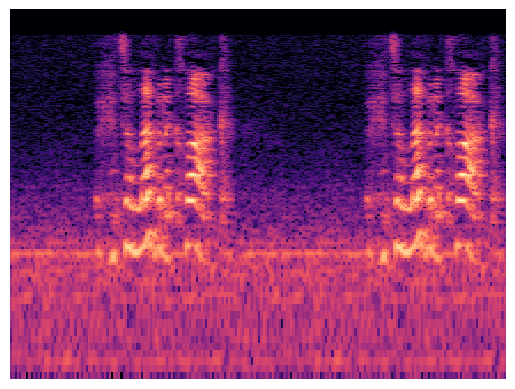

In [39]:
get_mel_spectrogram(FullDS_path+"/10139_C_disgust.wav","/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/CREMAD_test.png")


'/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/CREMAD_test.png'

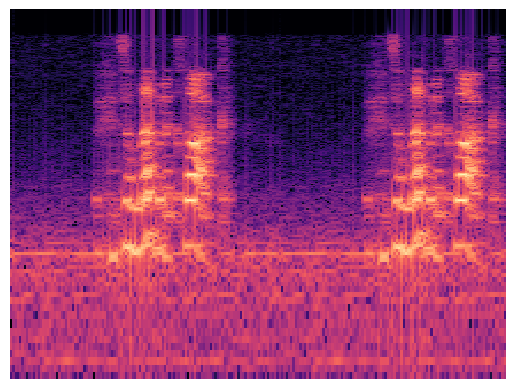

In [42]:
get_mel_spectrogram_GPU(FullDS_path+"/10139_C_disgust.wav","/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/CREMAD_test.png")


In [20]:
# HOP_SIZE=512
# def get_mel_spectrogram_GPU(wav_file, destination_to_save):
#     scale , sr = librosa.load(wav_file, sr = 22050) #sr= 22050 before
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(scale, hop_length=HOP_SIZE)), ref=np.max)
#     img=librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=HOP_SIZE, x_axis='time')
#     plt.axis('off')

#     fig = plt.gcf()
#     fig.canvas.draw()
#     image = torch.tensor(fig.canvas.renderer._renderer.buffer_rgba(), dtype=torch.uint8).permute(2, 0, 1)
#     image = image.unsqueeze(0).float() / 255.0

#     plt.savefig(destination_to_save, format='png', bbox_inches='tight')

#     # img=cv2.imread(destination_to_save)
#     # return img





In [21]:
# import librosa
# import librosa.display
# import matplotlib.pyplot as plt
# import torch

# HOP_SIZE = 512

# def get_mel_spectrogram_GPU(wav_file, destination_to_save):
#     # Load audio and transfer to GPU
#     scale, sr = librosa.load(wav_file, sr=22050)
#     scale_gpu = torch.from_numpy(scale).float().cuda()

#     # Compute mel spectrogram on the GPU
#     stft_gpu = torch.stft(scale_gpu, hop_length=HOP_SIZE,n_fft=2048,return_complex=True )
#     magnitude_gpu = torch.abs(stft_gpu)
#     mel_gpu = librosa.feature.melspectrogram(S=magnitude_gpu.cpu().numpy(), sr=sr, hop_length=HOP_SIZE)

#     # Convert mel spectrogram to dB scale
#     mel_db_gpu = librosa.power_to_db(mel_gpu, ref=np.max)

#     # Plot the mel spectrogram on the CPU
#     plt.figure()
#     librosa.display.specshow(mel_db_gpu, y_axis='log', sr=sr, hop_length=HOP_SIZE, x_axis='time')
#     plt.axis('off')

#     # Save the image
#     plt.savefig(destination_to_save, format='png', bbox_inches='tight')

#     # Clear the plot to release resources
#     # plt.clf()
#     # plt.close()

#     return destination_to_save


# GPU ACCELERATED GENERATION

In [22]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import torch
import numpy as np

HOP_SIZE = 512

def get_mel_spectrogram_GPU(wav_file, destination_to_save):
    # Load audio and transfer to GPU
    scale, sr = librosa.load(wav_file, sr=22050)
    scale_gpu = torch.from_numpy(scale).float().cuda()

    # Compute spectrogram on the GPU
    stft_gpu = torch.stft(scale_gpu, hop_length=HOP_SIZE,n_fft=2048,return_complex=True)
    magnitude_gpu = torch.abs(stft_gpu)
    D_gpu = librosa.amplitude_to_db(magnitude_gpu.cpu().numpy(), ref=np.max)

    # Plot the spectrogram on the CPU
    plt.figure()
    librosa.display.specshow(D_gpu, y_axis='log', sr=sr, hop_length=HOP_SIZE, x_axis='time')
    plt.axis('off')

    # Save the image
    plt.savefig(destination_to_save, format='png', bbox_inches='tight')

    # Clear the plot to release resources
    plt.clf()
    plt.close()

    return destination_to_save


In [23]:
get_mel_spectrogram_GPU(FullDS_path+"/27_C_happy.wav","/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/CREMAD_test_gpu.png")


'/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/CREMAD_test_gpu.png'

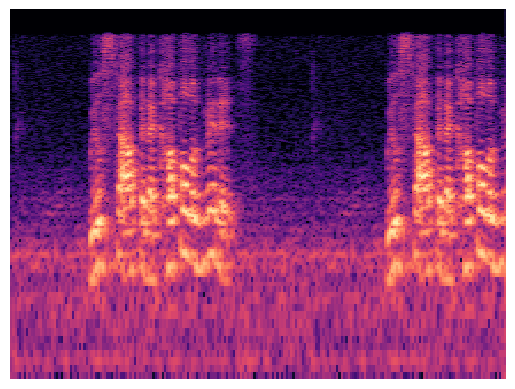

In [24]:
get_mel_spectrogram(FullDS_path+"/27_C_happy.wav","/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/test/CREMAD_test_nogpu.png")


In [36]:
parent_dest="/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/Mels_FullDS_Looped_Sara"

for f in RAVDESS_paths:
  fileN=f.split("/")[-1].split(".")[0]
  dest=parent_dest+"/"+fileN+".png"
  #print(dest)
  #print(fileN)
  if  os.path.exists(dest):
    continue
  else:


    # print(fileN)
    # print(dest)
    get_mel_spectrogram_GPU(f,dest)


In [ ]:
# allmelsimgs=np.save("C:/Users/USER/Desktop/Sara Abbas 20190716/MelSpectrograms_Uni_imgs.npy",allimgs)

In [ ]:
# allmelslabels= np.save("C:/Users/USER/Desktop/Sara Abbas 20190716/MelSpectrograms_Uni_lbls.npy",lbls)


In [37]:
parent_dest="/content/drive/MyDrive/EmotionDetectionProject/2DCNN_Again_lab107/FullDS/Mels_FullDS_Looped_Sara"
c=0
for f in os.listdir(parent_dest):
  #print(f)
  c+=1

print(c)

10898
